# Does Netflix have better movies than Amazon Prime Video?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Conclusions

Both platforms have a good number of highly rated content, both from Rotten Tomatoes and IMDb. While Netflix has more movies in the top 100 from Rotten Tomatoes, Amazon Prime Video far outnumbers Netflix in high-rated content from IMDb. 

IMDb has many more genres in the top 100, and Amazon Prime Video's top 100 is similarly diverse. In total, the two platforms have a similar amount of content from the top 100 from either rater (Netflix:91; Amazon:109). 

Amazon Prime Video has much more content than Netflix, with more classic movies as well, but the two have a similar number of high-rated films from each year. 

While the distribution of IMDb ratings is similar across both platforms, Amazon Prime Video clearly has more content with lower ratings on Rotten Tomatoes.

In short: If quantity and diversity are most important, then Amazon Prime Video wins. If quality is more important, than Netflix outperforms Amazon.

## Analysis

In [159]:
data = pd.read_csv('Popular Movies TV Shows from Prime Videos Netflix version_3.csv')
data.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,Terminator: Dark Fate,2019,18+,6.2,81,Action & Adventure,0,1
1,Gemini Man,2019,13+,5.7,74,Action & Adventure,0,1
2,Rambo: Last Blood,2019,18+,6.1,72,Action & Adventure,0,1
3,The Courier,2019,18+,4.9,50,Action & Adventure,0,1
4,Crawl,2019,18+,6.1,79,Action & Adventure,0,1


## How many of the top-rated movies on Rotten Tomatoes are on either platform?

In [3]:
pallette_dict = {'Netflix': ['#A9A9A9', '#E50914'], 'Prime Video': ['#A9A9A9', '#00A8E1']}

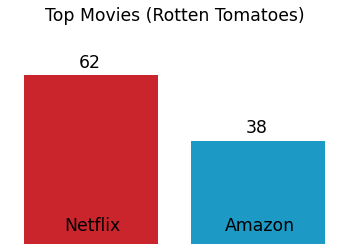

In [160]:
top100_rt = data.sort_values('Rotten Tomatoes', ascending=False).head(100)
sns.barplot(x=['Netflix', 'Amazon Prime Video'], 
            y=[top100_rt['Netflix'].sum(), top100_rt['Amazon Prime Video'].sum()], 
            palette=['#E50914', '#00A8E1'])
plt.title('Top Movies (Rotten Tomatoes)', fontsize='xx-large')
plt.text(x=-0.075, y=top100_rt['Netflix'].sum()+3, 
         s=str(top100_rt['Netflix'].sum()), color='#000000', 
         fontsize='xx-large')
plt.text(x=1-0.075, y=top100_rt['Amazon Prime Video'].sum()+3, 
         s=str(top100_rt['Amazon Prime Video'].sum()), color='#000000', 
         fontsize='xx-large')
plt.text(x=-0.16, y=5, 
         s='Netflix', color='#000000', 
         fontsize='xx-large')
plt.text(x=1-0.2, y=5, 
         s='Amazon', color='#000000', 
         fontsize='xx-large')
plt.ylim((0,80))
plt.axis('off');

        

In [5]:
top100_rt['Netflix'].sum()

62

## How many of the top-rated movies on IMDb are on either platform?

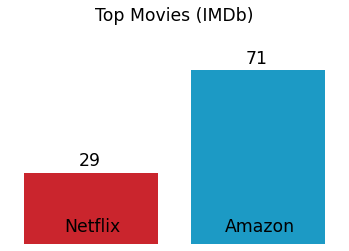

In [161]:
top100_imdb = data.sort_values('IMDb', ascending=False).head(100)
sns.barplot(x=['Netflix', 'Amazon Prime Video'], 
            y=[top100_imdb['Netflix'].sum(), top100_imdb['Amazon Prime Video'].sum()],
            palette=['#E50914', '#00A8E1'])
plt.text(x=-0.075, y=top100_imdb['Netflix'].sum()+3, 
         s=str(top100_imdb['Netflix'].sum()), color='#000000', 
         fontsize='xx-large')
plt.text(x=1-0.075, y=top100_imdb['Amazon Prime Video'].sum()+3, 
         s=str(top100_imdb['Amazon Prime Video'].sum()), color='#000000', 
         fontsize='xx-large')
plt.text(x=-0.16, y=5, 
         s='Netflix', color='#000000', 
         fontsize='xx-large')
plt.text(x=1-0.2, y=5, 
         s='Amazon', color='#000000', 
         fontsize='xx-large')
plt.title('Top Movies (IMDb)', fontsize='xx-large')
plt.ylim((0, 89))
plt.axis('off');

It looks like Netflix has the upper hand when it comes to Rotten Tomatoes, but Amazon Prime Video has many more of the top-rated movies on IMDb.

## How are the top movies distributed across genres?

In [7]:
genre_rt = top100_rt.groupby('Genre').count()['Title']
genre_imdb = top100_imdb.groupby('Genre').count()['Title']

top100 = pd.concat([top100_rt, top100_imdb])

genre_netflix = top100[top100['Netflix']==1].groupby('Genre').count()['Title']
genre_amazon = top100[top100['Amazon Prime Video']==1].groupby('Genre').count()['Title']

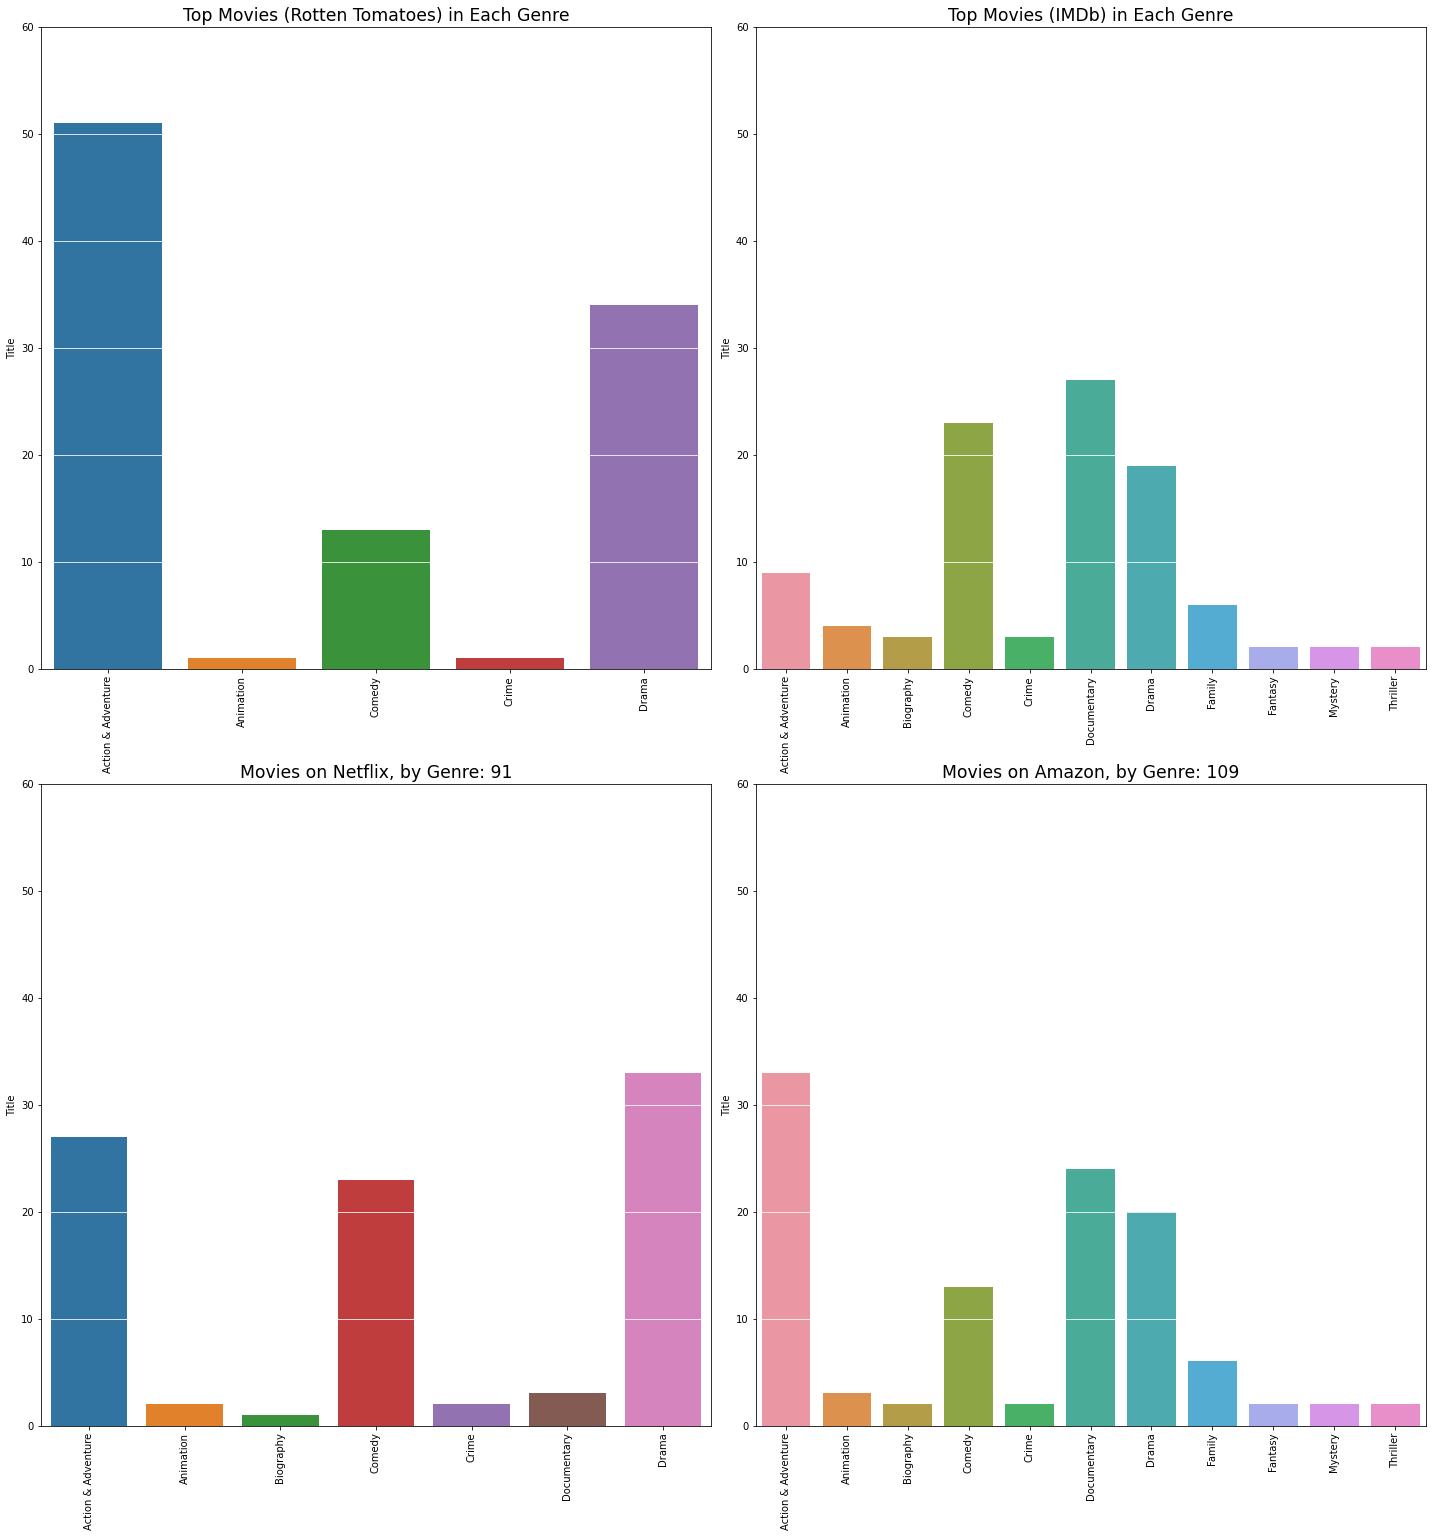

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.barplot(x=genre_rt.index, y=genre_rt)
plt.xticks(rotation=90)
plt.title('Top Movies (Rotten Tomatoes) in Each Genre', fontsize='xx-large')
plt.grid(True, axis='y', color='white')
plt.ylim((0,60))
plt.xlabel("")

plt.subplot(2,2,2)
sns.barplot(x=genre_imdb.index, y=genre_imdb)
plt.xticks(rotation=90)
plt.title('Top Movies (IMDb) in Each Genre', fontsize='xx-large')
plt.grid(True, axis='y', color='white')
plt.ylim((0,60))
plt.xlabel("")

plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(x=genre_netflix.index, y=genre_netflix)
plt.xticks(rotation=90)
plt.title('Movies on Netflix, by Genre: ' + str(top100['Netflix'].sum()), fontsize='xx-large')
plt.grid(True, axis='y', color='white')
plt.ylim((0,60))
plt.xlabel("")

plt.subplot(2,2,4)
sns.barplot(x=genre_amazon.index, y=genre_amazon)
plt.xticks(rotation=90)
plt.title('Movies on Amazon, by Genre: ' + str(top100['Amazon Prime Video'].sum()), 
          fontsize='xx-large')
plt.grid(True, axis='y', color='white')
plt.ylim((0,60))
plt.xlabel("");

The top rated movies/shows on IMDb are much more deverse, in terms of genre, than those from Rotten Tomatoes.

The top movies available on Amazon Prime Video are also more diverse, by genre, than the top movies available on Netflix. However, the total number of top 100 movies/shows on each service is similar; 109 to 91 in favor of Amazon.

## Top 100 Movies by Year

In [9]:
top100_per_year_rt = top100_rt.groupby('Year').count()['Title']
top100_rt = top100_rt.merge(top100_per_year_rt, on='Year')

top100_per_year_imdb = top100_imdb.groupby('Year').count()['Title']
top100_imdb = top100_imdb.merge(top100_per_year_imdb, on='Year')

top100_per_year = top100.groupby('Year').count()['Title']
top100 = top100.merge(top100_per_year, on='Year')

In [11]:
top100_rt.columns = ['Title', 'Year', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genre',
       'Netflix', 'Amazon Prime Video', 'year_count']
top100_imdb.columns = ['Title', 'Year', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genre',
       'Netflix', 'Amazon Prime Video', 'year_count']
top100.columns = ['Title', 'Year', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genre',
       'Netflix', 'Amazon Prime Video', 'year_count']

In [33]:
top100['platform'] = ""
top100.loc[top100['Netflix'] == 1, 'platform'] = "Netflix"
top100.loc[top100['Amazon Prime Video'] == 1, 'platform'] = "Amazon"

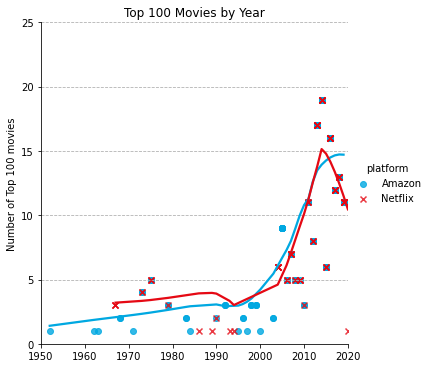

In [59]:
sns.lmplot(x='Year', y='year_count', data=top100, lowess=True, hue='platform',
          markers=['o','x'], palette=['#00A8E1','#E50914'])
plt.title('Top 100 Movies by Year')
plt.ylim((0, 25))
plt.xlim((1950, 2020))
plt.ylabel('Number of Top 100 movies')
plt.xlabel('')
plt.grid(axis='y',linestyle='dashed');

## What about just older movies in general?

In [62]:
data['platform'] = ""
data.loc[data['Netflix'] == 1, 'platform'] = "Netflix"
data.loc[data['Amazon Prime Video'] == 1, 'platform'] = "Amazon"

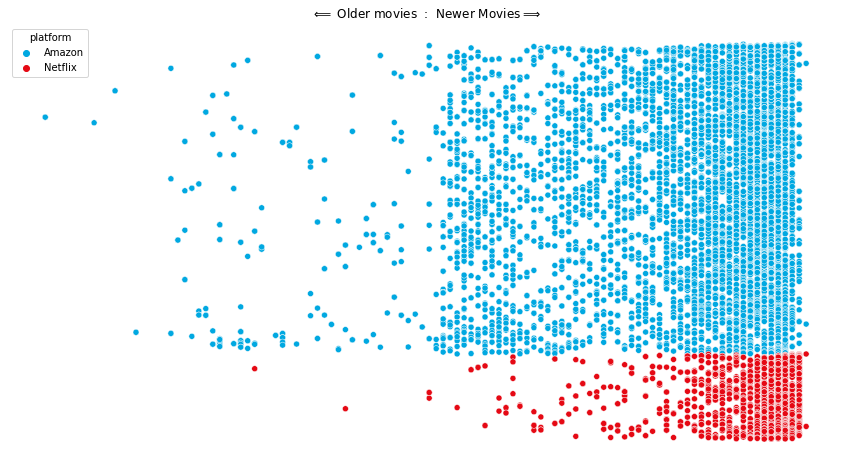

In [85]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Year', y=data['platform']+data['Title'], 
                data=data, hue='platform',
               palette=['#00A8E1','#E50914'])
plt.axis('off')
plt.title('$\Longleftarrow$ ' + 'Older movies  :  Newer Movies' + '$\Longrightarrow$', 
          fontsize='large');

In [92]:
data['IMDb'] = data['IMDb'].astype(float)
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].astype(float)

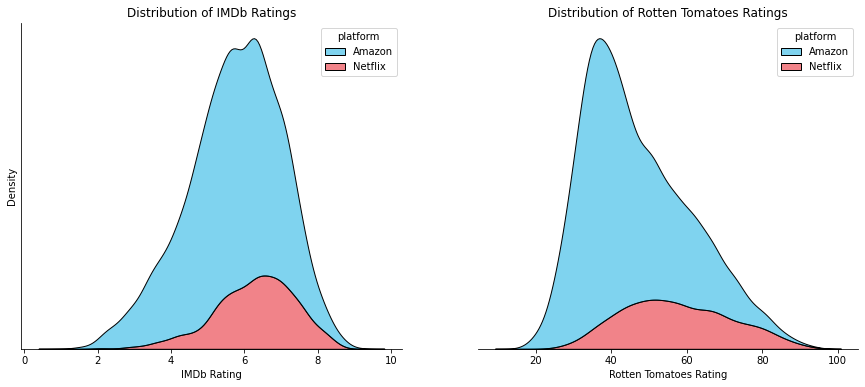

In [156]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.kdeplot(x='IMDb', hue='platform', data=data, palette=['#00A8E1','#E50914'],
           multiple='stack', alpha=0.5)
ax.tick_params(
    axis='y',          
    which='both',     
    left=False,      
    right=False,  
    labelleft=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Distribution of IMDb Ratings')
ax.set_xlabel("IMDb Rating")


plt.subplot(1,2,2)
ax1 = sns.kdeplot(x='Rotten Tomatoes', hue='platform', data=data, palette=['#00A8E1','#E50914'],
           multiple='stack', alpha=0.5)
ax1.tick_params(
    axis='y',          
    which='both',     
    left=False,      
    right=False,  
    labelleft=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_title('Distribution of Rotten Tomatoes Ratings')
ax1.set_xlabel("Rotten Tomatoes Rating")
ax1.set_ylabel('')
plt.show();

### References

Code inspired by:

[1] https://towardsdatascience.com/tv-shows-on-online-streaming-services-a-visual-comparison-using-python-cd269bed44fd